# Assignment
### Instructions
In the next series of challenges, we will predict employee salaries from different employee characteristics (or features). We ask employees working in four different fields to state their salary and some background information.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as sm
import seaborn as sns
from statistics import mean, stdev
import scipy.stats as stats
#from scipy import stats

In [2]:
# Reading in the data
salar = pd.read_csv("salary.csv")
salar.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


#### 1. How many responders are there? Are there any missing values in any of the variables?

In [3]:
salar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
salary         513 non-null float64
exprior        514 non-null int64
yearsworked    514 non-null int64
yearsrank      514 non-null int64
market         514 non-null float64
degree         514 non-null int64
otherqual      514 non-null int64
position       514 non-null int64
male           514 non-null int64
Field          514 non-null int64
yearsabs       514 non-null int64
dtypes: float64(2), int64(9)
memory usage: 44.3 KB


##### There's a total of 514 entries, 11 columns where 9 of them consist of interger values and the other two have float values.

In [4]:
salar.isnull().sum()

salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

In [5]:
salaries = salar.dropna(axis = 0, how ='any')

In [6]:
salaries.isnull().sum()

salary         0
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

This information indicates that there's only one missing value under the column labeled "salary". All the other columns have no missing values.

In [7]:
salaries.describe()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
count,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000
mean,50863.220098,2.931774,12.836257,7.046784,0.948558,0.964912,0.044834,2.130604,0.750487,2.526316,6.994152
std,12685.132358,4.794327,9.447040,6.419708,0.149524,0.184181,0.207142,0.819977,0.433153,1.126644,16.887552
min,29000.000000,0.000000,0.000000,0.000000,0.710000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40000.000000,0.000000,4.000000,2.000000,0.840000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000
50%,50096.000000,1.000000,12.000000,5.000000,0.920000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000
75%,60345.000000,4.000000,22.000000,12.000000,1.020000,1.000000,0.000000,3.000000,1.000000,4.000000,2.000000
max,96156.000000,25.000000,41.000000,28.000000,1.330000,1.000000,1.000000,3.000000,1.000000,4.000000,118.000000


#### 2. What is the lowest salary and highest salary in the group?

In [8]:
print("The lowest salary in the group is $", salaries['salary'].min())
print("The highest salary in the group is $", salaries['salary'].max())

The lowest salary in the group is $ 29000.0
The highest salary in the group is $ 96156.0


#### 3. What is the mean salary for the sample? Include the standard error of the mean.

In [9]:
print("The mean salary for the sample is $", salaries['salary'].mean())
print("The standard error for the mean is $", salaries['salary'].sem())

The mean salary for the sample is $ 50863.22009783625
The standard error for the mean is $ 560.0622753925232


#### 4. What is the standard deviation for the years worked?

In [10]:
print("The mean standard deviation for the years worked is", salaries['yearsworked'].std())

The mean standard deviation for the years worked is 9.447040460636984


#### 5. What is the median salary for the sample?

In [11]:
print("The median salary for the sample is $", salaries['salary'].median())

The median salary for the sample is $ 50096.0


#### 6. What is the interquartile range for salary in the sample?

In [12]:
Q1 = salaries['salary'].quantile(0.25)
Q3 = salaries['salary'].quantile(0.75)
print("The interquartile range for salary in the sample is $", Q3-Q1)

The interquartile range for salary in the sample is $ 20345.0


#### 7. How many men are there in the sample? How many women are there in the sample? Present this information in a table.

In [13]:
# list comprehension
print(salaries['male'].unique())
salaries['male']= ['Male' if each==1 else 'Female' for each in salaries['male']]

[1 0]


/home/recruit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
Genders = salaries[['male']].copy()
Genders = pd.DataFrame(salaries.groupby('male').size()).reset_index()
Genders = Genders.rename(columns=({'male':'Gender'}))
Genders = Genders.rename(columns={0:"Total"})
Genders

,Gender,Total
0,Female,128
1,Male,385


#### 8. How many women are executives compared to men?

In [15]:
print(salaries['position'].unique())
salaries['position'] = salaries['position'].map({1: "Junior", 2: "Manager", 3: "Executive"})
#mob_money.head()

[1 2 3]


/home/recruit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
females = salaries[salaries['male'] == 'Female']
males = salaries[salaries['male'] == 'Male']
print("There are", len(females[females.position == "Executive"]),"women who are executives",
      "compared to", len(males[males.position == "Executive"]), "men.")

There are 19 women who are executives compared to 191 men.


#### 9. Create a histogram for the variable Salary.

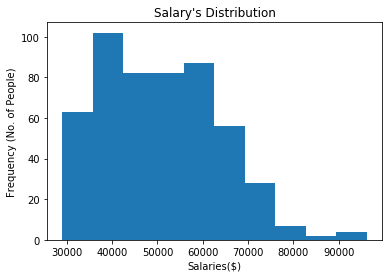

In [17]:
plt.hist(x = salaries['salary'])
plt.title("Salary's Distribution")
plt.xlabel('Salaries($)')
plt.ylabel('Frequency (No. of People)')
plt.show()

#### 10. Examine the histogram and describe the distribution for Salary.

With respect to skewness, the data is positively skewed. There seems to be much more people earning salaries between 30000 and 70000 dollars. However, we also notice how there are quite a lesser number of people earning around 50000 dollars, which is also a value circulating around the mean and median. This begs the question of whether or not the mean and median are values we can use to approximate our data.

It seems as though, there are more people earning between 30000 and 40000 dollars, as well as between a little over 50000 and a little over 60000 dollars. This could be the reason why the mean and the median are roughly 50000 dollars.

Salary is highly distributed at a roughly 35000 dollars mark. Although many more people do earn much highly, the distribution of salary gets lower around the 50000 dollars mark, it continues to get highly distributed again as it approaches the 60000 and 70000 dollars mark.

#### 11. Create a bar graph to show the different average salaries of men and women. 
##### (Bonus: Add error bars to the bars showing the 95% confidence interval). What does the graph tell you about the difference between men and women’s salaries?

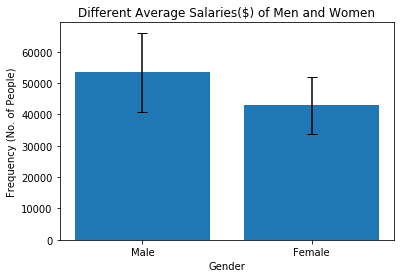

In [18]:
males_ave = mean(salaries[salaries['male'] == 'Male'].salary)
females_ave = mean(salaries[salaries['male'] == 'Female'].salary)

males_stdev = stdev(salaries[salaries['male'] == 'Male'].salary)
females_stdev = stdev(salaries[salaries['male'] == 'Female'].salary)

plt.bar(['Male', 'Female'],[males_ave, females_ave], yerr=[males_stdev, females_stdev], capsize=5)
plt.title("Different Average Salaries($) of Men and Women")
plt.xlabel('Gender')
plt.ylabel('Frequency (No. of People)')
plt.show()

The average salaries with respect to gender clearly shows that men generally earn a higher proportion of salaries, with an average of roughly between 50000-55000 dollars as opposed to women who earn at an average of roughly 40000-45000 dollars. 

The errorbars, reflecting how far the data would be spread out around the average (mean), i.e standard deviation, it is quite evident that men still earn the highest more than women. 

#### 12. Create a scatterplot with seaborn showing the relationship between Years Worked and Salary (don’t forget to insert a trend line).

Text(-8.700000000000003, 0.5, 'Salary ($)')

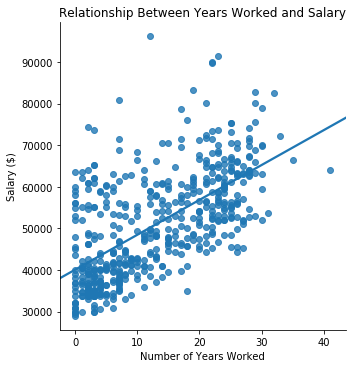

In [19]:
sns.lmplot(x = "yearsworked", y = "salary", data = salaries, ci = None)
plt.title("Relationship Between Years Worked and Salary")
plt.xlabel("Number of Years Worked")
plt.ylabel("Salary ($)")

##### - What is the relationship between Years Worked and Salary?
Generally, the trendline is showing a linearly positive relationship between the number of years worked and the salary received therof. 
Due tocertain outliers, that seem to fall too far away from the trendline, we may not assume that salaries are range higher with respect to the amount of years one has worked. There are still many other factors that need to be considered, like one's position for instance.

##### - Describe any patterns in the scatterplot.
The pattern generally reflects a positive linear relationship between years worked and salary. The more years one tends to have worked, the higher the salary they receive. Hence, in general, the patern reflects a positively linear relationship.

##### - Do you notice any unusual/extreme values that do not fit the general trend? If you see any unusual values, briefly describe them (Who are they? In what way are they different?)
There are certain outliers, for instance, The highest salary earner has worked for no more tha 20years whereas the longest working employee earns no 70000 dollars, which is way below the trendline, with respect to how much they need to earn in the amount of years they have been working.
This raises questions of factors that need to explored further. Questions of whether one's position or field of work affects their salary, with or without any regards to the amount of years they have worked.

##### 13. Using the pearsonr function from the scipy.stats package, calculate the Pearson correlation coefficient (and its corresponding p value) to determine the nature of the relationship between Years Worked and Salary. See help (pearsonr) for help on this function.

In [20]:
corr, p_value = stats.pearsonr(salaries['yearsworked'], salaries['salary'])
print('The Pearson correlation coefficient is', corr, 'and its corresponding p-value is', p_value)

The Pearson correlation coefficient is 0.6235888657598048 and its corresponding p-value is 1.2873351342916404e-56


##### Interpret the size and direction of the correlation statistic.

The correlation coefficient is 0.62, thus reflecting a positive linear relationship between Years Worked and Salary. However, the strength of the relationship is quite moderate, thus indicating that it's not the strongest factor. Therefore, it wouldn't be completely accurate to conclude that one's income is solely based on the number of years one has worked. 

This correlation also indicates that only 38% of the variation in the number of years worked is related to the salary one would earn. 

##### Is the relationship statistically significant? Report the appropriate statistic(s) to support your answer.

Given that my null hypothesis is to show that there exists a significant relationship between Years Worked and Salary.

The previously calculated p-value is less than the alpla (significance) level of 0.05, where p-value = 0.

Thus, we conclude that there exists a significant relationship between Years Worked and Salary and we do not reject the null hypothesis at a 5% level of significance.